<img src="../images/pokeball.png" width="100" align="right">

# Visualization of the<br> Favorite Pok&eacute;mon Survey Results
---
In this notebook, I will generate different visualizations of the [Favorite Pok&eacute;mon Survey](<https://www.reddit.com/r/pokemon/comments/c04rvq/survey_testing_the_every_pok%C3%A9mon_is_someones/>) results. The data was collected and made public by [reddit user mamamia1001](https://www.reddit.com/user/mamamia1001/). Full credit goes to him/her. For more info, take a look at the [README file](../README.md). 

Furthermore, I will be including a few comments on the results and how I interpret them. You can find these all through the notebook <font color='blue' style="font-weight:bold">in blue</font>.

Alright, let's get started.


# Preliminaries
First, let's import all the relevant packages, configure some plotting options, and define some basic (path) variables.

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pathlib

In [3]:
mpl.rcParams['font.sans-serif'] = "Calibri"
mpl.rcParams['font.family'] = "sans-serif"
#sns.set(font_scale=1.75)
#sns.set_style('ticks')
plt.rc('axes.spines', top=False, right=False)

In [4]:
# Define paths.
PATH_DATA = pathlib.Path(r'../data')

# Read data
I [downloaded a copy](../data) of the [original results](https://docs.google.com/spreadsheets/d/1c16Wh4AawHGbTi3Eq1DGZQdM4FMUlJO1YwXJZ_ylRvg/edit#gid=557303698) as an Excel file. Let's read just the relevant parts:

In [5]:
df_raw = pd.read_excel(PATH_DATA/'responses.xlsx', sheet_name='Form Responses 1')
df_raw.rename(columns={'Timestamp':'timestamp', 'What is your favourite Pokémon?':'vote'}, inplace=True)

# Remove any potential NaN.
df_raw.dropna(inplace=True)

df_raw.head(3)

,timestamp,vote
0,2019-06-13 13:02:02.242,Munchlax
1,2019-06-13 12:44:00.726,Type-Null
2,2019-06-13 12:44:45.607,Giratina


In [6]:
df = pd.read_excel(PATH_DATA/'responses.xlsx', sheet_name='Results', usecols='A:E')
df.rename(columns={'Results in full':'name', 'Unnamed: 1':'votes', 'Unnamed: 2':'type', 'Unnamed: 3':'generation', 'Unnamed: 4':'family'}, inplace=True)

# Shift the index by 1, so that it matches the Pokemon number.
df.index = df.index + 1

# Remove any potential NaN.
df.dropna(inplace=True)

df.head(3)

,name,votes,type,generation,family
1,Bulbasaur,710.0,Grass Poison,1.0,Bulbasaur
2,Ivysaur,83.0,Grass Poison,1.0,Bulbasaur
3,Venusaur,127.0,Grass Poison,1.0,Bulbasaur


# Original Analysis
As a sanity check, let's (re)compute the already reported numbers.

### Number of valid votes
Original result: 52725

From the raw results:

In [7]:
n_votes = len(df_raw)
print(n_votes)

52725


From the aggregated results:

In [8]:
n_votes = df['votes'].sum()
print(n_votes)

52725.0


### Average votes per Pok&eacute;mon
Original result: 65

In [9]:
n_pokemon = len(df['name'].unique())
print(n_votes/n_pokemon)

65.17305315203956


### Average votes per Pok&eacute;mon per generation

In [10]:
df.groupby(['generation']).mean()

,votes
generation,
1.0,121.119205
2.0,91.150000
3.0,70.140741
4.0,70.383178
5.0,28.147436
6.0,29.916667
7.0,20.181818


It might be interesting to see this in a plot:

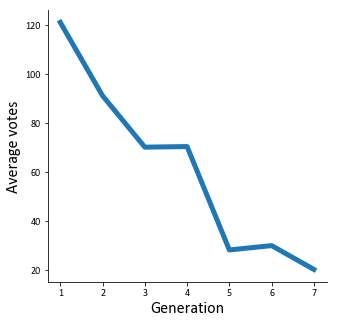

In [37]:
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
ax.plot(np.arange(1,7+1), df.groupby(['generation']).mean()['votes'], linewidth=5)
ax.set_xlabel("Generation", fontdict = {'fontsize':16})
ax.set_ylabel("Average votes", fontdict = {'fontsize':16})
plt.show()

This is a very interesting result. <font color='blue' style="font-weight:bold">It seems that there is a much larger preference for Pok&eacute;mon of earlier generations. </font> Does nostalgia play an important role here? It is hard to say. It would be very interesting to have more information on the voters' profile (e.g., age). Unfortunately, we don't have those data.

### Pok&eacute;mon ranking
Sort Pok&eacute;mon from most to least popular:

In [11]:
df_sorted = df.sort_values('votes', ascending=False)

The top 10 (most popular) Pok&eacute;mon:

In [12]:
df_sorted.head(10)

,name,votes,type,generation,family
6,Charizard,1107.0,Fire Flying Dragon,1.0,Charmander
94,Gengar,1056.0,Ghost Poison,1.0,Gastly
59,Arcanine,923.0,Fire,1.0,Growlithe
1,Bulbasaur,710.0,Grass Poison,1.0,Bulbasaur
257,Blaziken,613.0,Fire Fighting,3.0,Torchic
197,Umbreon,607.0,Dark,2.0,Eevee
448,Lucario,604.0,Fighting Steel,4.0,Riolu
282,Gardevoir,585.0,Psychic Fairy,3.0,Ralts
133,Eevee,581.0,Normal,1.0,Eevee
149,Dragonite,551.0,Dragon Flying,1.0,Dratini


The top 10 (most popular) Pok&eacute;mon *families*:

In [13]:
df[['votes', 'family']].groupby(['family']).sum().sort_values('votes', ascending=False).head(10)

,votes
family,
Eevee,2865.0
Charmander,1551.0
Gastly,1384.0
Growlithe,1199.0
Cyndaquil,1092.0
Squirtle,1066.0
Ralts,924.0
Bulbasaur,920.0
Scyther,818.0


The least popular Pok&eacute;mon. Those who received 0 votes:

In [14]:
df_sorted.query('votes == 0')

,name,votes,type,generation,family
574,Gothita,0.0,Psychic,5.0,Gothita
603,Eelektrik,0.0,Electric,5.0,Tynamo
266,Silcoon,0.0,Bug,3.0,Wurmple
734,Yungoos,0.0,Normal,7.0,Yungoos


...and those who received 1 vote:

In [15]:
df_sorted.query('votes == 1')

,name,votes,type,generation,family
540,Sewaddle,1.0,Bug Grass,5.0,Sewaddle
594,Alomomola,1.0,Water,5.0,Alomomola
790,Cosmoem,1.0,Psychic,7.0,Cosmog
343,Baltoy,1.0,Ground Psychic,3.0,Baltoy
451,Skorupi,1.0,Poison Bug,4.0,Skorupi
732,Trumbeak,1.0,Normal Flying,7.0,Pikipek
102,Exeggcute,1.0,Grass Psychic,1.0,Exeggcute
504,Patrat,1.0,Normal,5.0,Patrat


The bottom 10 (least popular) Pok&eacute;mon *families*:

In [16]:
df[['votes', 'family']].groupby('family').sum().sort_values('votes', ascending=False).tail(10)

# Notice that a similar result could be achieved by using
# df[['votes', 'family']].groupby('family').sum().sort_values('votes', ascending=True).head(10)

,votes
family,
Virizion,4.0
Thundurus,4.0
Uxie,3.0
Terrakion,3.0
Tapu-Bulu,2.0
Tapu-Fini,2.0
Phione,2.0
Tornadus,2.0
Landorus,2.0


The most popular Pok&eacute;mon by generation:

In [17]:
idx = df.groupby('generation')['votes'].transform(max) == df['votes']
df[idx]

,name,votes,type,generation,family
6,Charizard,1107.0,Fire Flying Dragon,1.0,Charmander
197,Umbreon,607.0,Dark,2.0,Eevee
257,Blaziken,613.0,Fire Fighting,3.0,Torchic
448,Lucario,604.0,Fighting Steel,4.0,Riolu
637,Volcarona,290.0,Bug Fire,5.0,Larvesta
700,Sylveon,282.0,Fairy,6.0,Eevee
778,Mimikyu,284.0,Ghost Fairy,7.0,Mimikyu


### Paretto analysis
`mamamia1001` also generated a plot of the [Paretto principle](https://en.wikipedia.org/wiki/Pareto_principle) (also known as the 80/20 rule). Originally, it states that roughly 80% of the effects (in this case, votes) come from 20% of the causes (in this case, Pok&eacute;mon). Let's obtain such plot. 

First, let's compute the cumulative sum of votes and their corresponding vote percentage for each Pok&eacute;mon:

In [18]:
df_sorted['votes_cumulative'] = df_sorted['votes'].cumsum()
df_sorted['votes_cumulative_perc'] = (df_sorted['votes_cumulative']/n_votes) * 100

We just need to generate a few auxiliary variables to generate the plot:

In [19]:
df_sorted['pokemon_perc'] = (np.arange(1, n_pokemon+1)/n_pokemon)*100

# Find the index of the Pokemon corresponding to the 20% of the Pokemon.
index_pokemon_20 = abs(df_sorted['pokemon_perc'] - 20).idxmin()

# Find the index and value of the Pokemon corresponding to the 80% of the votes.
pokemon_votes_80_idx = abs(df_sorted['votes_cumulative_perc'] - 80).idxmin()
pokemon_votes_80 = df_sorted.loc[pokemon_votes_80_idx, 'pokemon_perc']

# Find the index and value of the votes corresponding to the 20% of the Pokemon
votes_pokemon_20_idx = abs(df_sorted['pokemon_perc'] - 20).idxmin()
votes_pokemon_20 = df_sorted.loc[votes_pokemon_20_idx, 'votes_cumulative_perc']

# Find the index of the votes corresponding to the 80% of the votes.
index_votes_80 = abs(df_sorted['votes_cumulative_perc'] - 80).idxmin()


Actually generate the Paretto plot:

Text(0,0.5,'Vote %')

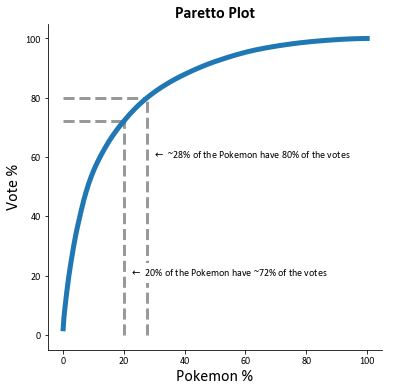

In [35]:
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.plot(df_sorted['pokemon_perc'], df_sorted['votes_cumulative_perc'], linewidth=5)

plt.hlines(80, 0, pokemon_votes_80, linewidth=3, linestyles='dashed', colors=[0.6, 0.6, 0.6])
plt.hlines(votes_pokemon_20, 0, df_sorted.loc[index_pokemon_20, 'pokemon_perc'], linewidth=3, linestyles='dashed', colors=[0.6, 0.6, 0.6])

plt.vlines(20, 0, df_sorted.loc[index_pokemon_20, 'votes_cumulative_perc'], linewidth=3, linestyles='dashed', colors=[0.6, 0.6, 0.6])
plt.vlines(df_sorted.loc[index_votes_80, 'pokemon_perc'], 0, df_sorted.loc[index_votes_80, 'votes_cumulative_perc'], linewidth=3, linestyles='dashed', colors=[0.6, 0.6, 0.6])

plt.text(22, 20, r"$\leftarrow$ 20% of the Pokemon have ~{0:.0f}% of the votes".format(votes_pokemon_20), backgroundcolor='w')
plt.text(pokemon_votes_80+2, 60, r"$\leftarrow$ ~{0:.0f}% of the Pokemon have 80% of the votes".format(pokemon_votes_80), backgroundcolor='w')

ax.set_title("Paretto Plot", fontdict = {'fontsize':16, 'fontweight':'bold'})
ax.set_xlabel("Pokemon %", fontdict = {'fontsize':16})
ax.set_ylabel("Vote %", fontdict = {'fontsize':16})

plt.show()

# New Analysis
Alright, time to go to uncharted territory. 

# Analysis

This is an interesting result. It looks like there is a strong love (nostalgia, perhaps?) for the first generations.